In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import *
from tqdm import tqdm
from tensorflow.keras.utils import plot_model

%matplotlib inline

## Simulation 1: 1-dim no interaction

In [2]:
def sim_data_1(sample_size, seed=None):
    
    if seed is not None:
        np.random.seed(seed)
    

    X = np.random.uniform(low=-1, high=1, size=(sample_size, ))
    A = np.random.choice([0, 1], size=(sample_size, 2))
    Y = 3 + X * 5
    
    optA = np.zeros((sample_size, 2))

    for i in range(sample_size):
        if (A[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i] - 2 * X[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + 4 * X[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] - 3 * X[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + X[i] + np.random.normal(size=(1, ))
            
        if X[i] >= 0:
            optA[i, :] = np.array([1, 0])
        elif X[i] < 0:
            optA[i, :] = np.array([0, 1])

    return Y, X, A, optA

def pred_val_1(Y, A, D):


    numerator = np.sum(Y[np.all(D == A, axis=1)])
    denominator = np.sum(np.all(D == A, axis=1))
    
    return numerator / denominator

In [4]:
embed_list = np.zeros((100, 4))
vals_list = np.zeros((100, 2))

for i in tqdm(range(100)):
    Y_train, X_train, A_train, optA_train = sim_data_1(1000)
    Y_test, X_test, A_test, optA_test = sim_data_1(10000)
    mcitr = MCITR()
    mcitr.fit(Y_train, X_train, A_train, learning_rate=1e-2, epochs=300)

    embed_list[i, 0] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[i, 1] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[i, 2] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[i, 3] = mcitr.trt_encoder.predict(np.array([[1, 1]]))
    
    D_test = mcitr.predict(X_test, A_test)
    vals_list[i, 0] = pred_val_1(Y_test, A_test, D_test)
    vals_list[i, 1] = pred_val_1(Y_test, A_test, optA_test)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:22<00:00,  4.43s/it]


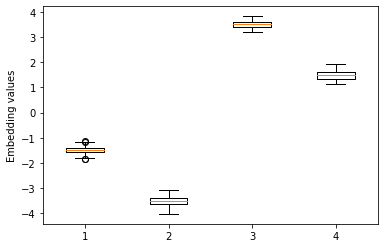

In [8]:
plt.boxplot(embed_list)
plt.ylabel("Embedding values")
plt.savefig("case1_embedding.jpg", dpi=300)

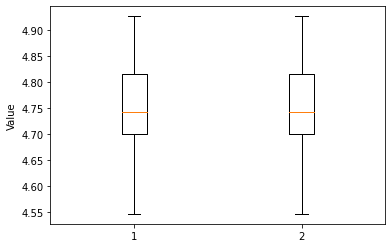

In [10]:
plt.boxplot(vals_list)
plt.ylabel("Value")
plt.savefig("case1_value.jpg", dpi=300)

## Simulation 2: 1-dim interaction

In [13]:
def sim_data_2(sample_size, seed=None):
    
    if seed is not None:
        np.random.seed(seed)

    X = np.random.uniform(low=-1, high=1, size=(sample_size, ))
    A = np.random.choice([0, 1], size=(sample_size, 2))
    Y = 3 + X * 5
    
    optA = np.zeros((sample_size, 2))

    for i in range(sample_size):
        if (A[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i] - 6 * X[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + 4 * X[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] - 3 * X[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + 5 * X[i] + np.random.normal(size=(1, ))
            
        if X[i] >= 0:
            optA[i, :] = np.array([1, 1])
        elif X[i] < 0:
            optA[i, :] = np.array([0, 0])


    return Y, X, A, optA

def pred_val_2(Y, A, D):


    numerator = np.sum(Y[np.all(D == A, axis=1)])
    denominator = np.sum(np.all(D == A, axis=1))
    
    return numerator / denominator

In [14]:
embed_list = np.zeros((100, 4))
vals_list = np.zeros((100, 2))

for i in tqdm(range(100)):
    Y_train, X_train, A_train, optA_train = sim_data_2(1000)
    Y_test, X_test, A_test, optA_test = sim_data_2(10000)
    mcitr = MCITR()
    mcitr.fit(Y_train, X_train, A_train, learning_rate=1e-2, epochs=300)

    embed_list[i, 0] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[i, 1] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[i, 2] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[i, 3] = mcitr.trt_encoder.predict(np.array([[1, 1]]))
    
    D_test = mcitr.predict(X_test, A_test)
    vals_list[i, 0] = pred_val_2(Y_test, A_test, D_test)
    vals_list[i, 1] = pred_val_2(Y_test, A_test, optA_test)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:20<00:00,  4.41s/it]


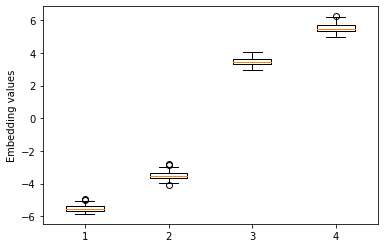

In [15]:
plt.boxplot(embed_list)
plt.ylabel("Embedding values")
plt.savefig("case2_embedding.jpg", dpi=300)

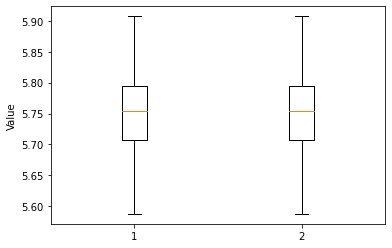

In [16]:
plt.boxplot(vals_list)
plt.ylabel("Value")
plt.savefig("case2_value.jpg", dpi=300)

## Simulation 3: 3-dim no interaction

In [10]:
def sim_data_3(sample_size, seed):

    np.random.seed(seed)

    X = np.random.uniform(low=-1, high=1, size=(sample_size, 3))
    A = np.random.choice([0, 1], size=(sample_size, 2))
    Y = 3 + X[:, 0] + 2 * X[:, 1] - X[:, 2]

    for i in range(sample_size):
        if (A[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([-4, 6, -6])) + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, 0, 1])) + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, -3, 2])) + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([2, -3, 3])) + np.random.normal(size=(1, ))

    return Y, X, A

def pred_val_3(X, D):

    n = X.shape[0]
    Y = np.zeros((n, ))
    Y = 3 + X[:, 0] + 2 * X[:, 1] - X[:, 2]
    for i in range(n):
        if (D[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([-4, 6, -6]))
        elif (D[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, 0, 1]))
        elif (D[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, -3, 2]))
        elif (D[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([2, -3, 3]))

    return np.mean(Y)

In [11]:
embed_list = np.zeros((100, 4, 3))

for seed in tqdm(range(100)):
    Y, X, A = sim_data_3(1000, seed)
    mcitr = MCITR()
    mcitr.fit(Y, X, A, learning_rate=1e-2, epochs=300, R=Y - 3 - X[:, 0] - 2 * X[:, 1] + X[:, 2]) # given the true residual

    embed_list[seed, 0, :] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[seed, 1, :] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[seed, 2, :] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[seed, 3, :] = mcitr.trt_encoder.predict(np.array([[1, 1]]))


100%|██████████| 100/100 [08:11<00:00,  4.91s/it]


{'whiskers': [<matplotlib.lines.Line2D at 0x24a1303d1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x24a1303d880>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a13042e20>,
 'medians': [<matplotlib.lines.Line2D at 0x24a1303dfa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24a13052370>,
 'means': []}

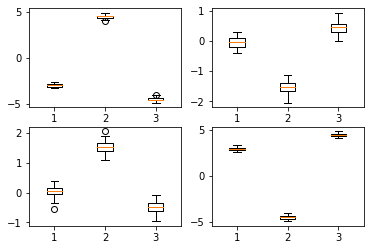

In [12]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].boxplot(embed_list[:, 0, :])
ax[0, 1].boxplot(embed_list[:, 1, :])
ax[1, 0].boxplot(embed_list[:, 2, :])
ax[1, 1].boxplot(embed_list[:, 3, :])

## Simulation 4: 3-dim, interaction

In [13]:
def sim_data_4(sample_size, seed):

    np.random.seed(seed)

    X = np.random.uniform(low=-1, high=1, size=(sample_size, 3))
    A = np.random.choice([0, 1], size=(sample_size, 2))
    Y = 3 + X[:, 0] + 2 * X[:, 1] - X[:, 2]

    for i in range(sample_size):
        if (A[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([-2, -2, -5/2])) + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([3/2, -1, 1/2])) + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([-1/2, 1, -1])) + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, 2, 3])) + np.random.normal(size=(1, ))

    return Y, X, A

def pred_val_4(X, D):

    n = X.shape[0]
    Y = np.zeros((n, ))
    Y = 3 + X[:, 0] + 2 * X[:, 1] - X[:, 2]
    for i in range(n):
        if (D[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([-2, -2, -5/2]))
        elif (D[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([3/2, -1, 1/2]))
        elif (D[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([-1/2, 1, -1]))
        elif (D[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, 2, 3]))

    return np.mean(Y)

In [14]:
embed_list = np.zeros((100, 4, 3))

for seed in tqdm(range(100)):
    Y, X, A = sim_data_4(1000, seed)
    mcitr = MCITR()
    mcitr.fit(Y, X, A, learning_rate=1e-2, epochs=300)

    embed_list[seed, 0, :] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[seed, 1, :] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[seed, 2, :] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[seed, 3, :] = mcitr.trt_encoder.predict(np.array([[1, 1]]))

100%|██████████| 100/100 [07:29<00:00,  4.50s/it]


{'whiskers': [<matplotlib.lines.Line2D at 0x24a17d40b50>,
 'caps': [<matplotlib.lines.Line2D at 0x24a17d48220>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a17d407c0>,
 'medians': [<matplotlib.lines.Line2D at 0x24a17d48940>,
 'fliers': [<matplotlib.lines.Line2D at 0x24a17d48cd0>,
 'means': []}

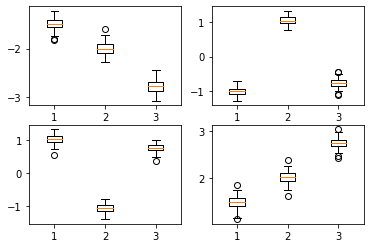

In [15]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].boxplot(embed_list[:, 0, :])
ax[0, 1].boxplot(embed_list[:, 1, :])
ax[1, 0].boxplot(embed_list[:, 2, :])
ax[1, 1].boxplot(embed_list[:, 3, :])

In [16]:
embed_list = np.zeros((100, 4, 3))

for seed in tqdm(range(100)):
    Y, X, A = sim_data_4(1000, seed)
    mcitr = MCITR(layer_enc=2, layer_dec=3, layer_cov=0, width_enc=20, width_dec=20, act_enc="relu", act_dec="relu") 
    mcitr.fit(Y, X, A, learning_rate=1e-2, epochs=300)

    embed_list[seed, 0, :] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[seed, 1, :] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[seed, 2, :] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[seed, 3, :] = mcitr.trt_encoder.predict(np.array([[1, 1]]))

100%|██████████| 100/100 [08:14<00:00,  4.94s/it]


{'whiskers': [<matplotlib.lines.Line2D at 0x24a11908f40>,
 'caps': [<matplotlib.lines.Line2D at 0x24a11908340>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a11908d00>,
 'medians': [<matplotlib.lines.Line2D at 0x24a10438700>,
 'fliers': [<matplotlib.lines.Line2D at 0x24a104388b0>,
 'means': []}

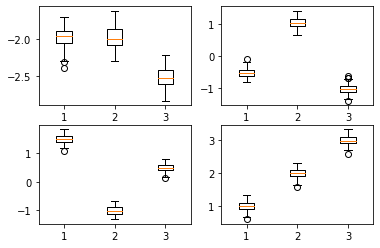

In [17]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].boxplot(embed_list[:, 0, :])
ax[0, 1].boxplot(embed_list[:, 1, :])
ax[1, 0].boxplot(embed_list[:, 2, :])
ax[1, 1].boxplot(embed_list[:, 3, :])